#Report 1
By: Sean Rock

###Problem 1: Optimum Design of an I-beam
In building construction, horizontal structural components that bear loads perpendicular to their longitudinal direction are typically beams. To support the combined weight of stacked walls and transfer the support load, larger and heavier beams called transfer beams are often used.

The main goal of the problem is to find a Python package in order to perform multi-objective engineering design optimization for a load-bearing I-beam. I chose the genetical algorithm library (https://pypi.org/project/geneticalgorithm/).

In [6]:
pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15080 sha256=0b51f1f20dc7934abbac6694480a146884047fc3daeaf2d65a5f845ff08c9d40
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


The general optimization goal for this I-beam problem is to minimize F=[f1,f2]T where the cross section area (f1) and the static deflection (f2) of the I-beam are defined as:

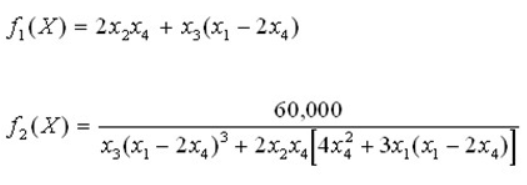

The two objectives are conflicting in nature since minimization of f1 will result in maximization of f2 and vice versa.
The geometric side constraints are: 10 ≤ X1 ≤ 80, 10 ≤ X2 ≤ 50, 0.9 ≤ X3 ≤ 5.0, 0.9 ≤ X4 ≤ 5.0.
The weighted approach where the two objective functions are converted into a single one with the below equation is used for the multi-objective optimization: F = a•f1 + b•f2.
Note that [a,b] is the weight vector and you can use any values as long as a+b=1 (a and b are the degrees of importance associated with f1 and f2, respectively).

In [10]:
import numpy as np
import math
from geneticalgorithm import geneticalgorithm as ga

def fEven(x):
    return (0.5*(((2*x[1])*x[3])+(x[2]*(x[0]-(2*x[3])))))+((0.5)*
     (60000/((x[2]*math.pow((x[0]-2*x[3]),3)) +2*x[1]*x[3]*
      ((4*(math.pow(x[3],2)))+3*x[0]*(x[0]-2*x[3])))))

def fFavorsF1(x):
    return (0.75*(((2*x[1])*x[3])+(x[2]*(x[0]-(2*x[3])))))+((0.25)*
     (60000/((x[2]*math.pow((x[0]-2*x[3]),3)) +2*x[1]*x[3]*
      ((4*(math.pow(x[3],2)))+3*x[0]*(x[0]-2*x[3])))))

def fFavorsF2(x):
    return (0.25*(((2*x[1])*x[3])+(x[2]*(x[0]-(2*x[3])))))+((0.75)*
     (60000/((x[2]*math.pow((x[0]-2*x[3]),3)) +2*x[1]*x[3]*
      ((4*(math.pow(x[3],2)))+3*x[0]*(x[0]-2*x[3])))))

def f1(x):
    return (1*(((2*x[1])*x[3])+(x[2]*(x[0]-(2*x[3])))))

def f2(x):
    return (60000/((x[2]*math.pow((x[0]-2*x[3]),3)) +2*x[1]*x[3]*
      ((4*(math.pow(x[3],2)))+3*x[0]*(x[0]-2*x[3]))))

# values were arrived at because they were effective in achieving
# more optimal results
algorithm_param = {'max_num_iteration': 1000,\
                   'population_size':1000,\
                   'mutation_probability':0.03,\
                   'elit_ratio': 0.02,\
                   'crossover_probability': 0.75,\
                   'parents_portion': 0.2,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

varbound=np.array([[10,80],[10,50],[0.9,5.0],[0.9,5.0]])

Above, I define the 5 variations of the function that I am running the genetic algorithm on. The GA results of the first two functions show how F1 and F2 can be minimized individually. F1 benefits from the variables being at the low end of their value range while F2 is smallest when the variables are at the high end meaning that lowering F1's output comes at the cost of F2. It also revealed that the cost of the F1 function is much steeper than the F2 function. This has implications for the combined F function.

Next, I ran the combined function three times: once where F1 is prioritized, once with F2 prioritized, and once where F1 and F2 are evenly weighted. Because of the costly nature of F1 on the whole formula, all three functions attempt to minimize that value the most. This is achieved by most the variables being set to low end of the acceptable range of values. However, as the coefficient of F2 is increased; the X1 value grows proportionally. This was seen in the results as the X1 value equaled: 10.12291895 in the fFavorsF1 function, 14.06455612 in the fEven function, and 19.59304105 in the fFavorsF2 function. Also, the GA output value corresponded with the weights given. The more weight given to F1 the higher the final cost would be and vice versa.

 The best solution found:
 [10.00546444 10.00584155  0.90009323  0.90041428]

 Objective function:
 25.403742336587335


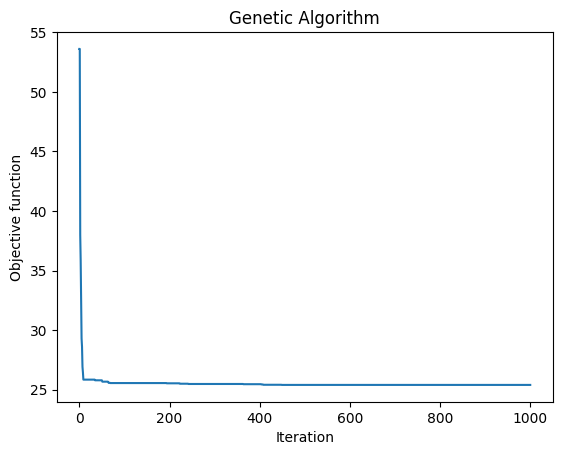

In [11]:
model=ga(function=f1,dimension=4,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=algorithm_param)


model.run()

 The best solution found:
 [79.9927458  49.99774659  4.99982249  4.99937019]

 Objective function:
 0.0059046051417308305


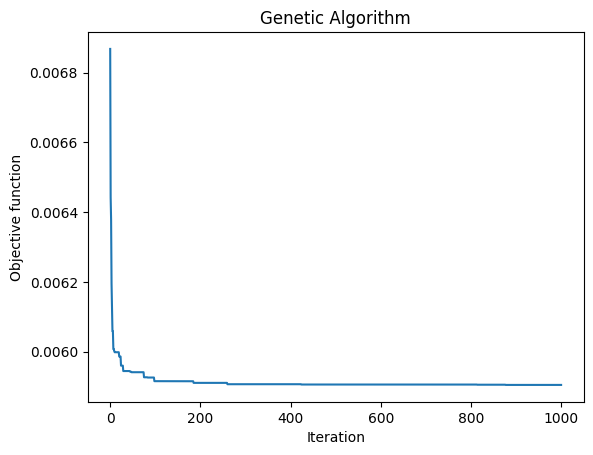

In [12]:
model=ga(function=f2,dimension=4,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=algorithm_param)


model.run()

 The best solution found:
 [14.06455612 10.00253844  0.90059022  0.90010136]

 Objective function:
 17.243828561108472


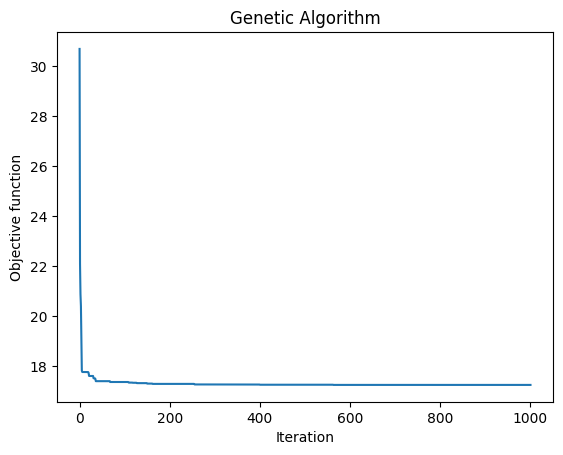

In [13]:
model=ga(function=fEven,dimension=4,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=algorithm_param)


model.run()

 The best solution found:
 [10.12291895 10.00106973  0.90002056  0.90019522]

 Objective function:
 22.047286726988837


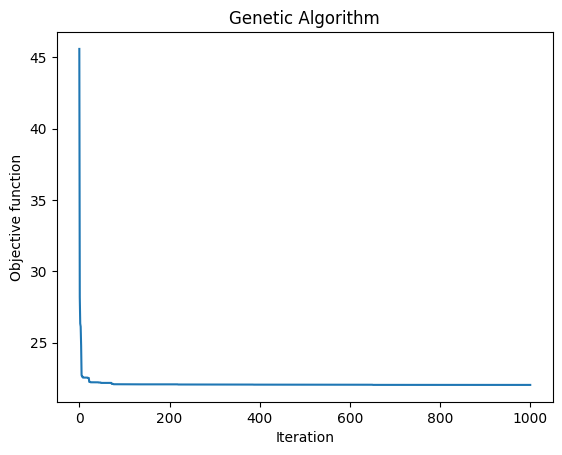

In [14]:
model=ga(function=fFavorsF1,dimension=4,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=algorithm_param)


model.run()

 The best solution found:
 [19.59304105 10.00426204  0.90018259  0.90039015]

 Objective function:
 10.3853310440829


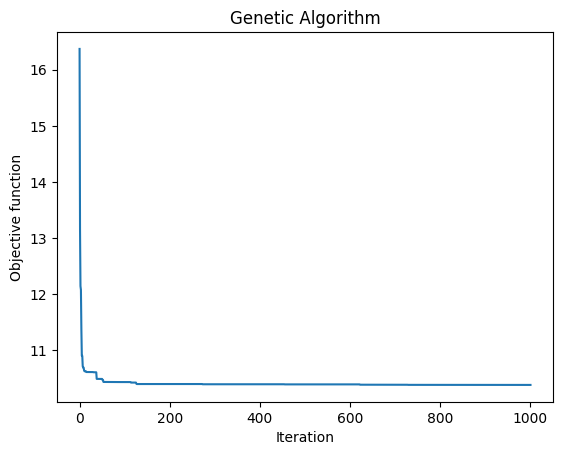

In [15]:
model=ga(function=fFavorsF2,dimension=4,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=algorithm_param)


model.run()